

# Reporte de problemas fitosanitarios en plantaciones de agave
--------------------

## Equipo 36

| Nombre | Matr√≠cula |
| ------ | --------- |
| Andr√© Martins Cordebello | A00572928 |
| Enrique Eduardo Sol√≠s Da Costa | A00572678 |
| Delbert Francisco Custodio Vargas | A01795613 |

## Avance 3: baseline

Este avance consiste en construir un modelo de referencia que permita evaluar la viabilidad del problema. Si el baseline tiene un rendimiento similar al azar, podr√≠a indicar que el problema es intr√≠nsecamente dif√≠cil o que los datos no contienen suficiente informaci√≥n para predecir el objetivo. De lo contrario, el baseline podr√≠a como una soluci√≥n m√≠nima aceptable cuando se trabaja en escenarios donde incluso un modelo simple puede proporcionar valor.

Un baseline facilita tambi√©n la gesti√≥n de expectativas, tanto dentro del equipo como con los stakeholders, pues proporciona una comprensi√≥n inicial de lo que se puede lograr con m√©todos simples antes de invertir tiempo y recursos en enfoques m√°s complejos.

Se empieza con la carga del archivo con el cual se estar√° trabajando.

In [23]:
import pandas as pd
df = pd.read_excel('baseline.xlsx')
df.head()

Unnamed: 0                   tramp_id sampling_date       lat        lon  \
0           0  167_THUE13-16-104-0009T13    2014-01-01  20.01578 -102.57259   
1           1  167_THUE13-16-104-0009T15    2014-01-01  20.01428 -102.57326   
2           2  167_THUE13-16-104-0009T25    2014-01-01  20.01524 -102.57386   
3           3  167_THUE13-16-104-0009T10    2014-01-01  20.01723 -102.57218   
4           4  167_THUE13-16-104-0009T28    2014-01-01  20.01699 -102.57360   

  municipality  square_area  plantation_age  capture_count      state  ...  \
0     VILLAMAR         0.33               0            0.0  MICHOACAN  ...   
1     VILLAMAR         0.34               0            0.0  MICHOACAN  ...   
2     VILLAMAR         0.33               0            0.0  MICHOACAN  ...   
3     VILLAMAR         0.33               0            0.0  MICHOACAN  ...   
4     VILLAMAR         0.33               0            0.0  MICHOACAN  ...   

   month_cos  critical_season  severity_encoded distance_to_nearest_hotspot  \
0   0.866025                0                 0                   62.301408   
1   0.866025                0                 0                   62.483803   
2   0.866025                0                 0                   62.407969   
3   0.866025                0                 0                   62.134520   
4   0.866025                0                 0                   62.215955   

   hotspots_within_5km                              text_feature_location  \
0                    0  La trampa con identificacion 167_THUE13-16-104...   
1                    0  La trampa con identificacion 167_THUE13-16-104...   
2                    0  La trampa con identificacion 167_THUE13-16-104...   
3                    0  La trampa con identificacion 167_THUE13-16-104...   
4                    0  La trampa con identificacion 167_THUE13-16-104...   

                                   text_feature_risk  \
0  La trampa con identificacion 167_THUE13-16-104...   
1  La trampa con identificacion 167_THUE13-16-104...   
2  La trampa con identificacion 167_THUE13-16-104...   
3  La trampa con identificacion 167_THUE13-16-104...   
4  La trampa con identificacion 167_THUE13-16-104...   

                                text_feature_capture  \
0  Durante la temporada normal el dia 1 del mes E...   
1  Durante la temporada normal el dia 1 del mes E...   
2  Durante la temporada normal el dia 1 del mes E...   
3  Durante la temporada normal el dia 1 del mes E...   
4  Durante la temporada normal el dia 1 del mes E...   

                             text_feature_plantation  \
0  En una plantacion de agave azul con area de 0....   
1  En una plantacion de agave azul con area de 0....   
2  En una plantacion de agave azul con area de 0....   
3  En una plantacion de agave azul con area de 0....   
4  En una plantacion de agave azul con area de 0....   

                             text_feature_all_things  
0  En una plantacion de agave azul con area de 0....  
1  En una plantacion de agave azul con area de 0....  
2  En una plantacion de agave azul con area de 0....  
3  En una plantacion de agave azul con area de 0....  
4  En una plantacion de agave azul con area de 0....  

[5 rows x 31 columns]

Para lograr realizar un estudio de manera r√°pida y concisa, se estar√° trabajando √∫nicamente con los datos obtenidos en los a√±os 2023 a 2025 para reducir tiempos de entrenamiento y poder probar con m√°s modelos en menos tiempo. Adem√°s, se eliminan columnas de texto que se utilizar√°n para entrenar el LLM del chatbot que se desarrollar√°, pero que no son de importancia para este estudio.

In [24]:
# ===============================
# Filtrar dataset (2023-2025) y eliminar columnas no necesarias
# ===============================

# Filtrar solo los a√±os 2023, 2024 y 2025
df = df[df['year'].between(2023, 2025)]

# Verificar los valores √∫nicos en la columna 'year'
print("A√±os disponibles en el dataset:", df['year'].unique())

# Eliminar columnas de texto irrelevantes
cols_to_drop = [
    'text_feature_location',
    'text_feature_risk',
    'text_feature_capture',
    'text_feature_plantation',
    'text_feature_all_things'
]

# Verificar si existen antes de eliminarlas
cols_present = [col for col in cols_to_drop if col in df.columns]
df = df.drop(columns=cols_present)

print(f"Columnas eliminadas: {cols_present}")
print("Dimensiones finales del dataset:", df.shape)

# (Opcional) Guardar el dataset filtrado en un nuevo archivo
df.to_excel("baseline_filt_23_25.xlsx", index=False)
print("Archivo guardado como baseline_filt_23_25.xlsx")


A√±os disponibles en el dataset: [2023 2024 2025]
Columnas eliminadas: ['text_feature_location', 'text_feature_risk', 'text_feature_capture', 'text_feature_plantation', 'text_feature_all_things']
Dimensiones finales del dataset: (171683, 26)
Archivo guardado como baseline_filt_23_25.xlsx


Se vuelve a hacer un an√°lisis de las variables categoricas para determinar si son relevantes para el estudio y si necesitan alg√∫n tipo de encoder.

In [25]:
# ===============================
# An√°lisis inicial del dataset filtrado (2023-2025)
# ===============================

import pandas as pd

# Cargar el archivo filtrado
df = pd.read_excel("baseline_filt_23_25.xlsx")

# Mostrar informaci√≥n general
print("Dimensiones del dataset:", df.shape)
print("\nColumnas del dataset:")
print(df.columns.tolist())

# Tipos de datos y conteo de valores nulos
print("\nResumen de tipos de datos y valores nulos:")
print(df.info())
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Verificar si hay variables categ√≥ricas
print("\nVariables categ√≥ricas detectadas:")
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(cat_cols if len(cat_cols) > 0 else "No se detectaron variables categ√≥ricas")

# Mostrar ejemplo de los primeros registros
print("\nPrimeras filas del dataset:")
display(df.head())

Dimensiones del dataset: (171683, 26)

Columnas del dataset:
['Unnamed: 0', 'tramp_id', 'sampling_date', 'lat', 'lon', 'municipality', 'square_area', 'plantation_age', 'capture_count', 'state', 'square_area_imputed', 'month', 'year', 'year_month', 'day_of_year_sin', 'day_of_year_cos', 'day_of_week_sin', 'day_of_week_cos', 'week_of_year_sin', 'week_of_year_cos', 'month_sin', 'month_cos', 'critical_season', 'severity_encoded', 'distance_to_nearest_hotspot', 'hotspots_within_5km']

Resumen de tipos de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171683 entries, 0 to 171682
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   171683 non-null  int64         
 1   tramp_id                     171683 non-null  object        
 2   sampling_date                171683 non-null  datetime64[ns]
 3   lat                        

Unnamed: 0                   tramp_id sampling_date        lat         lon  \
0      656173  162_THUE13-16-074-0027T01    2023-01-01  20.096520 -102.814320   
1      656174  162_THUE13-16-074-0007T01    2023-01-01  20.147118 -102.896716   
2      656175  162_THUE13-16-074-0013T01    2023-01-01  20.142147 -102.882885   
3      656176  162_THUE13-16-074-0012T01    2023-01-01  20.144013 -102.882413   
4      656177  162_THUE13-16-074-0024T01    2023-01-01  20.146415 -102.881007   

            municipality  square_area  plantation_age  capture_count  \
0  COJUMATLAN DE REGULES          1.0               0            0.0   
1  COJUMATLAN DE REGULES          1.0               0            0.0   
2  COJUMATLAN DE REGULES          2.0               0            0.0   
3  COJUMATLAN DE REGULES          2.0               0            0.0   
4  COJUMATLAN DE REGULES          2.0               0            0.0   

       state  ...  day_of_week_sin  day_of_week_cos  week_of_year_sin  \
0  MICHOACAN  ...        -0.781831          0.62349     -2.449294e-16   
1  MICHOACAN  ...        -0.781831          0.62349     -2.449294e-16   
2  MICHOACAN  ...        -0.781831          0.62349     -2.449294e-16   
3  MICHOACAN  ...        -0.781831          0.62349     -2.449294e-16   
4  MICHOACAN  ...        -0.781831          0.62349     -2.449294e-16   

  week_of_year_cos  month_sin  month_cos  critical_season  severity_encoded  \
0              1.0        0.5   0.866025                0                 0   
1              1.0        0.5   0.866025                0                 0   
2              1.0        0.5   0.866025                0                 0   
3              1.0        0.5   0.866025                0                 0   
4              1.0        0.5   0.866025                0                 0   

   distance_to_nearest_hotspot  hotspots_within_5km  
0                       9999.0                    0  
1                       9999.0                    0  
2                       9999.0                    0  
3                       9999.0                    0  
4                       9999.0                    0  

[5 rows x 26 columns]

Se opt√≥ por eliminar la columna 'tramp_ID', ya que esta no agrega datos relevantes, as√≠ como severity_encoded que es redundante con capture_count, as√≠ como codificar las columnas 'municipality' y 'state' y separar la columna 'year_month' para poder obtener √∫nicamente el mes (ya existe una columna con el a√±o del dato).

In [ ]:
# ===============================
# Preparaci√≥n de variables categ√≥ricas
# ===============================

# Eliminar ID de trampa (no es informativo para el efecto de este modelo)
if 'tramp_id' in df.columns:
    df = df.drop(columns=['tramp_id'])

#Eliminar severity_encoded (parece redundante con capture_count)
if 'severity_encoded' in df.columns:
    df = df.drop(columns=['severity_encoded'])

# Convertir columna 'year_month' a variables num√©ricas separadas y eliminar year (ya existente)
if 'year_month' and 'sampling_date' in df.columns:
    df['day'] = df['sampling_date'].dt.day
    df['month'] = df['sampling_date'].dt.month
    df = df.drop(columns=['year_month','sampling_date'])

# Codificar variables categ√≥ricas relevantes ('municipality', 'state')
df = pd.get_dummies(df, columns=['municipality', 'state'], drop_first=True)

# Verificar resultado
print("Columnas finales despu√©s de la codificaci√≥n:")
print(df.columns.tolist())

Columnas finales despu√©s de la codificaci√≥n:
['Unnamed: 0', 'lat', 'lon', 'square_area', 'plantation_age', 'capture_count', 'square_area_imputed', 'month', 'year', 'day_of_year_sin', 'day_of_year_cos', 'day_of_week_sin', 'day_of_week_cos', 'week_of_year_sin', 'week_of_year_cos', 'month_sin', 'month_cos', 'critical_season', 'distance_to_nearest_hotspot', 'hotspots_within_5km', 'day', 'municipality_ACATIC', 'municipality_ACATLAN DE JUAREZ', 'municipality_AHUACATLAN', 'municipality_AHUALULCO DE MERCADO', 'municipality_AMACUECA', 'municipality_AMATITAN', 'municipality_AMATLAN DE CANAS', 'municipality_AMECA', 'municipality_ARANDAS', 'municipality_ATENGO', 'municipality_ATENGUILLO', 'municipality_ATOTONILCO EL ALTO', 'municipality_ATOYAC', 'municipality_AUTLAN DE NAVARRO', 'municipality_AYOTLAN', 'municipality_AYUTLA', 'municipality_BRISENAS', 'municipality_CANADAS DE OBREGON', 'municipality_CASIMIRO CASTILLO', 'municipality_CHAPALA', 'municipality_CHIQUILISTLAN', 'municipality_CHURINTZIO'

Se hace la separaci√≥n de la base de datos en variables dependientes e independientes para que se pueda empezar a crear modelos de predicci√≥n.

In [27]:
# Definir variables predictoras y objetivo
X = df.drop(columns=['capture_count'])
y = df['capture_count']

print("\nX shape:", X.shape)
print("y shape:", y.shape)



X shape: (171683, 167)
y shape: (171683,)


Ya que hizo la separaci√≥n de las variables X y Y, se procede a crear un primer modelo de predicci√≥n utilizando Random Forest Regressor. Se opt√≥ por utilizar este m√©todo por que trabaja bien con datos no lineales, tolera outliers y nos permitir√° obtener la importancia de las variables. Se realiza el estudio utilizando los valores default de RandomForestRegressor.

In [ ]:
# ===============================
# Modelo Baseline - Random Forest
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dividir dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar modelo baseline
rf = RandomForestRegressor(
    n_estimators=100,       # n√∫mero de √°rboles
    max_depth=None,         # sin l√≠mite de profundidad
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Evaluaci√≥n
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Evaluaci√≥n del modelo baseline con Random Forest Regressor:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R¬≤   = {r2:.4f}")


üìä Evaluaci√≥n del modelo baseline:
MAE  = 2.8432
RMSE = 5.3918
R¬≤   = 0.4908


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean

üîπ XGBoost (reg:squarederror)
MAE  : 3.136
RMSE : 5.580
R¬≤   : 0.455
Best iteration (early stop): 498


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean


üîπ XGBoost (count:poisson)
MAE  : 3.134
RMSE : 5.636
R¬≤   : 0.444
Best n_estimators (early stop): 799

Top 15 features:
hotspots_within_5km                         0.075826
state_NAYARIT                               0.037307
municipality_EL GRULLO                      0.024916
distance_to_nearest_hotspot                 0.023550
municipality_IXTLAHUACAN DEL RIO            0.021845
state_JALISCO                               0.020987
municipality_VILLAMAR                       0.020902
year                                        0.019723
municipality_JUCHITLAN                      0.016684
municipality_TUXCACUESCO                    0.016171
municipality_YAHUALICA DE GONZALEZ GALLO    0.015818
municipality_ROMITA                         0.015632
municipality_MARAVATIO                      0.015345
municipality_AUTLAN DE NAVARRO              0.014855
municipality_CANADAS DE OBREGON             0.014845
dtype: float32


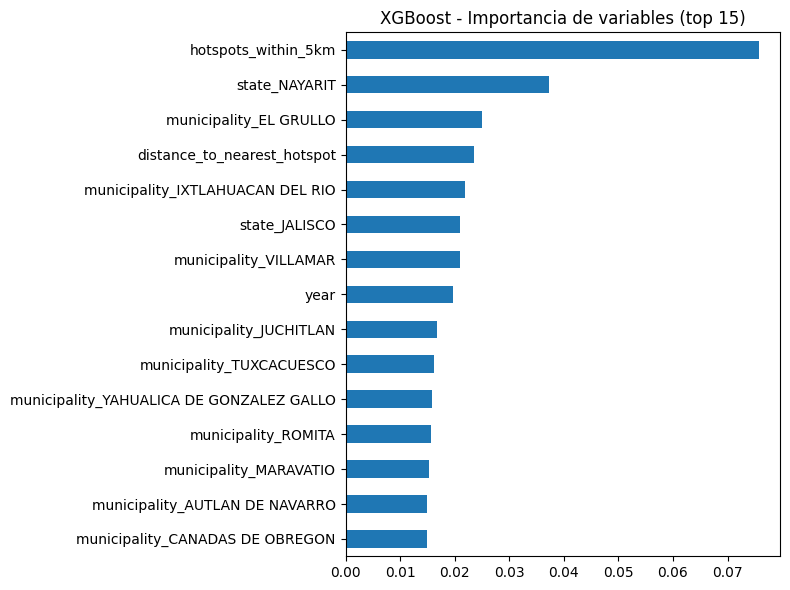

In [ ]:
# =========================================
# Baseline con XGBoost
# - Modelo 1: reg:squarederror (MSE)
# - Modelo 2: count:poisson (para conteos >= 0)
# =========================================

from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# --- split para nuevo estudio
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def eval_reg(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2   = r2_score(y_true, y_pred)
    return mae, rmse, r2

# ============== Modelo 1: cuadr√°tico est√°ndar ==============
xgb_mse = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

xgb_mse.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    early_stopping_rounds=50,
    verbose=False
)

pred_mse = xgb_mse.predict(X_valid)
mae1, rmse1, r21 = eval_reg(y_valid, pred_mse)

print("üîπ XGBoost (reg:squarederror)")
print(f"MAE  : {mae1:.3f}")
print(f"RMSE : {rmse1:.3f}")
print(f"R¬≤   : {r21:.3f}")
print(f"Best iteration (early stop): {xgb_mse.best_iteration}")

# ============== Modelo 2: Poisson (siempre que y >= 0) ==============
if (y_train.min() >= 0) and (y_valid.min() >= 0):
    xgb_pois = XGBRegressor(
        objective='count:poisson',      # mejor para conteos
        eval_metric='poisson-nloglik',  # m√©trica de validaci√≥n
        n_estimators=800,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1
    )

    xgb_pois.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        early_stopping_rounds=50,
        verbose=False
    )

    pred_pois = xgb_pois.predict(X_valid)
    mae2, rmse2, r22 = eval_reg(y_valid, pred_pois)

    print("\nüîπ XGBoost (count:poisson)")
    print(f"MAE  : {mae2:.3f}")
    print(f"RMSE : {rmse2:.3f}")
    print(f"R¬≤   : {r22:.3f}")
    print(f"Best n_estimators (early stop): {xgb_pois.best_iteration}")
else:
    print("\n‚ö†Ô∏è  Omitido modelo Poisson porque existen valores negativos en y.")

# ============== Importancias de variables (top 15) ==============
model_to_plot = xgb_pois if 'xgb_pois' in locals() else xgb_mse
importances = pd.Series(model_to_plot.feature_importances_, index=X.columns)
top15 = importances.sort_values(ascending=False).head(15)
print("\nTop 15 features:")
print(top15)

plt.figure(figsize=(8,6))
top15.sort_values().plot(kind='barh')
plt.title("XGBoost - Importancia de variables (top 15)")
plt.tight_layout()
plt.show()


Al realizar los estudios con XGBoost y con Random Forest Regressor, encontramos resultados ...............

In [ ]:
# ==============================================
# Bayesian Optimization (Optuna) + Random Forest
# Optuna "Fast Mode" para RandomForestRegressor
# - Muestra opcional de filas
# - Hold-out en objetivo (sin CV)
# - Pruner para cortar trials malos
# - Espacio de b√∫squeda estrecho
# ==============================================
import optuna

# ---------- Toggles ----------
ROWS_SAMPLE   = 60000      # None para usar todo; pon 60_000 ~ 120_000 seg√∫n tu m√°quina
TEST_SIZE_OBJ = 0.2        # hold-out dentro del objetivo
TEST_SIZE_FIN = 0.2        # hold-out final para reporte
N_TRIALS      = 20         # n interacciones
TIMEOUT       = None       # en segundos; p.ej. 900 para 15 min
RANDOM_STATE  = 42

# ---------- Copia y casting a float32 (m√°s r√°pido/memoria) ----------
X_bo = X.copy()
for c in X_bo.columns:
    if np.issubdtype(X_bo[c].dtype, np.floating):
        X_bo[c] = X_bo[c].astype(np.float32)

y_bo = y.astype(np.float32)

# ---------- Muestreo opcional ----------
if ROWS_SAMPLE is not None and ROWS_SAMPLE < len(X_bo):
    X_bo, _, y_bo, _ = train_test_split(
        X_bo, y_bo, train_size=ROWS_SAMPLE, random_state=RANDOM_STATE
    )

# ---------- Split fijo para el objetivo (repetible y r√°pido) ----------
Xtr_obj, Xva_obj, ytr_obj, yva_obj = train_test_split(
    X_bo, y_bo, test_size=TEST_SIZE_OBJ, random_state=RANDOM_STATE
)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 250, 320),  # tope moderado
        "max_depth": trial.suggest_categorical("max_depth", [None, 8, 12, 24]),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 12),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 8),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 0.7, 1.0]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "n_jobs": -1,
        "random_state": RANDOM_STATE,
    }

    # Entrena en hold-out (m√°s r√°pido que CV)
    model = RandomForestRegressor(**params)
    model.fit(Xtr_obj, ytr_obj)

    pred = model.predict(Xva_obj)
    rmse = mean_squared_error(yva_obj, pred, squared=False)

    # --- Pruning: si va mal, corta temprano comparando con mediana hist√≥rica
    trial.report(rmse, step=0)
    if trial.should_prune():
        raise optuna.TrialPruned()

    return rmse

# ---------- Pruner + estudio ----------
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
study = optuna.create_study(direction="minimize", pruner=pruner)
study.optimize(objective, n_trials=N_TRIALS, timeout=TIMEOUT, show_progress_bar=True)

print("\nüèÜ Mejores hiperpar√°metros (fast mode):")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")
print(f"Mejor RMSE (hold-out objetivo): {study.best_value:.4f}")

# ---------- Re-entrenar modelo final con TODO el dataset ----------
best_params = study.best_params.copy()
best_params.update({"n_jobs": -1, "random_state": RANDOM_STATE})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE_FIN, random_state=RANDOM_STATE
)

rf_best = RandomForestRegressor(**best_params)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)

print("\nüìä Desempe√±o final (hold-out):")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R¬≤   : {r2:.4f}")



[I 2025-10-12 12:22:25,274] A new study created in memory with name: no-name-6cdc7626-f273-4f74-b000-de88686735a4
  0%|          | 0/40 [00:00<?, ?it/s]C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 0. Best value: 5.44068:   2%|‚ñé         | 1/40 [00:06<04:02,  6.22s/it]C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 0. Best value: 5.44068:   2%|‚ñé  

[I 2025-10-12 12:22:31,496] Trial 0 finished with value: 5.440681896129188 and parameters: {'n_estimators': 163, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 5.440681896129188.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 0. Best value: 5.44068:   5%|‚ñå         | 2/40 [00:12<04:07,  6.53s/it]

[I 2025-10-12 12:22:38,236] Trial 1 finished with value: 6.026804724156904 and parameters: {'n_estimators': 431, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 5.440681896129188.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 2. Best value: 5.41809:   8%|‚ñä         | 3/40 [00:35<08:36, 13.96s/it]

[I 2025-10-12 12:23:01,033] Trial 2 finished with value: 5.418092152147166 and parameters: {'n_estimators': 428, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 2 with value: 5.418092152147166.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 2. Best value: 5.41809:  10%|‚ñà         | 4/40 [02:49<36:39, 61.10s/it]

[I 2025-10-12 12:25:14,409] Trial 3 finished with value: 6.242019136750203 and parameters: {'n_estimators': 420, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 1.0, 'bootstrap': False}. Best is trial 2 with value: 5.418092152147166.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 2. Best value: 5.41809:  12%|‚ñà‚ñé        | 5/40 [02:52<23:24, 40.13s/it]

[I 2025-10-12 12:25:17,335] Trial 4 finished with value: 6.2400583980070365 and parameters: {'n_estimators': 237, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 5.418092152147166.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 2. Best value: 5.41809:  12%|‚ñà‚ñé        | 5/40 [04:06<23:24, 40.13s/it]

[I 2025-10-12 12:26:32,260] Trial 5 finished with value: 5.428018629261081 and parameters: {'n_estimators': 424, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 0.7, 'bootstrap': False}. Best is trial 2 with value: 5.418092152147166.


Best trial: 2. Best value: 5.41809:  15%|‚ñà‚ñå        | 6/40 [04:07<29:29, 52.05s/it]C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 2. Best value: 5.41809:  18%|‚ñà‚ñä        | 7/40 [04:53<27:30, 50.01s/it]C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 2. Best value: 5.41809:  18%|‚ñà‚ñä        | 7/40 [04:53<27:30, 50.01s/it]

[I 2025-10-12 12:27:18,347] Trial 6 finished with value: 5.937177577824535 and parameters: {'n_estimators': 435, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 0.7, 'bootstrap': False}. Best is trial 2 with value: 5.418092152147166.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 2. Best value: 5.41809:  20%|‚ñà‚ñà        | 8/40 [05:06<20:25, 38.31s/it]

[I 2025-10-12 12:27:31,610] Trial 7 finished with value: 5.64354180798053 and parameters: {'n_estimators': 432, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 2 with value: 5.418092152147166.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 8. Best value: 5.39011:  22%|‚ñà‚ñà‚ñé       | 9/40 [06:04<23:03, 44.63s/it]

[I 2025-10-12 12:28:30,144] Trial 8 finished with value: 5.390105688392114 and parameters: {'n_estimators': 450, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 0.7, 'bootstrap': True}. Best is trial 8 with value: 5.390105688392114.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 8. Best value: 5.39011:  25%|‚ñà‚ñà‚ñå       | 10/40 [06:08<16:02, 32.10s/it]

[I 2025-10-12 12:28:34,166] Trial 9 finished with value: 6.452233167988146 and parameters: {'n_estimators': 403, 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 8 with value: 5.390105688392114.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 8. Best value: 5.39011:  28%|‚ñà‚ñà‚ñä       | 11/40 [06:46<16:16, 33.68s/it]

[I 2025-10-12 12:29:11,429] Trial 10 finished with value: 5.571740937899856 and parameters: {'n_estimators': 347, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 0.7, 'bootstrap': True}. Best is trial 8 with value: 5.390105688392114.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 11. Best value: 5.29618:  30%|‚ñà‚ñà‚ñà       | 12/40 [08:03<21:53, 46.91s/it]

[I 2025-10-12 12:30:28,603] Trial 11 finished with value: 5.296177516895531 and parameters: {'n_estimators': 346, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 1.0, 'bootstrap': True}. Best is trial 11 with value: 5.296177516895531.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 11. Best value: 5.29618:  32%|‚ñà‚ñà‚ñà‚ñé      | 13/40 [09:18<24:56, 55.44s/it]

[I 2025-10-12 12:31:43,677] Trial 12 finished with value: 5.309800043534319 and parameters: {'n_estimators': 339, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 1.0, 'bootstrap': True}. Best is trial 11 with value: 5.296177516895531.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 11. Best value: 5.29618:  35%|‚ñà‚ñà‚ñà‚ñå      | 14/40 [10:28<25:54, 59.80s/it]

[I 2025-10-12 12:32:53,556] Trial 13 finished with value: 5.332588685074218 and parameters: {'n_estimators': 318, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 1.0, 'bootstrap': True}. Best is trial 11 with value: 5.296177516895531.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  38%|‚ñà‚ñà‚ñà‚ñä      | 15/40 [11:28<24:58, 59.96s/it]

[I 2025-10-12 12:33:53,869] Trial 14 finished with value: 5.2936339628841145 and parameters: {'n_estimators': 267, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  40%|‚ñà‚ñà‚ñà‚ñà      | 16/40 [12:31<24:20, 60.83s/it]

[I 2025-10-12 12:34:56,738] Trial 15 finished with value: 5.2949035855769795 and parameters: {'n_estimators': 264, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  42%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 17/40 [13:31<23:13, 60.58s/it]

[I 2025-10-12 12:35:56,733] Trial 16 finished with value: 5.294384243237948 and parameters: {'n_estimators': 255, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 18/40 [14:21<21:00, 57.31s/it]

[I 2025-10-12 12:36:46,442] Trial 17 finished with value: 5.297749662253235 and parameters: {'n_estimators': 210, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 19/40 [15:29<21:12, 60.60s/it]

[I 2025-10-12 12:37:54,682] Trial 18 finished with value: 5.338080929438805 and parameters: {'n_estimators': 284, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 20/40 [15:59<17:09, 51.46s/it]

[I 2025-10-12 12:38:24,867] Trial 19 finished with value: 5.563836351641918 and parameters: {'n_estimators': 196, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 21/40 [16:04<11:51, 37.43s/it]

[I 2025-10-12 12:38:29,590] Trial 20 finished with value: 5.8930953020936165 and parameters: {'n_estimators': 251, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 22/40 [17:09<13:44, 45.79s/it]

[I 2025-10-12 12:39:34,859] Trial 21 finished with value: 5.296730875796139 and parameters: {'n_estimators': 281, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 23/40 [18:09<14:11, 50.09s/it]

[I 2025-10-12 12:40:35,005] Trial 22 finished with value: 5.294447585885783 and parameters: {'n_estimators': 258, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 24/40 [19:01<13:28, 50.55s/it]

[I 2025-10-12 12:41:26,612] Trial 23 finished with value: 5.294547486093766 and parameters: {'n_estimators': 220, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 25/40 [20:13<14:17, 57.16s/it]

[I 2025-10-12 12:42:39,206] Trial 24 finished with value: 5.309706717338795 and parameters: {'n_estimators': 304, 'max_depth': 24, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 26/40 [20:57<12:21, 52.94s/it]

[I 2025-10-12 12:43:22,304] Trial 25 finished with value: 5.3014511312058525 and parameters: {'n_estimators': 184, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 27/40 [21:32<10:21, 47.79s/it]

[I 2025-10-12 12:43:58,081] Trial 26 finished with value: 5.5616266092260265 and parameters: {'n_estimators': 236, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 28/40 [22:36<10:32, 52.71s/it]

[I 2025-10-12 12:45:02,257] Trial 27 finished with value: 5.306927375372226 and parameters: {'n_estimators': 272, 'max_depth': 24, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 29/40 [22:45<07:13, 39.37s/it]

[I 2025-10-12 12:45:10,515] Trial 28 finished with value: 5.716529816448508 and parameters: {'n_estimators': 376, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 30/40 [22:51<04:55, 29.57s/it]

[I 2025-10-12 12:45:17,221] Trial 29 finished with value: 5.38958106352021 and parameters: {'n_estimators': 154, 'max_depth': None, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 31/40 [23:31<04:51, 32.43s/it]

[I 2025-10-12 12:45:56,331] Trial 30 finished with value: 5.311658940344467 and parameters: {'n_estimators': 176, 'max_depth': 24, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 32/40 [24:17<04:53, 36.65s/it]

[I 2025-10-12 12:46:42,816] Trial 31 finished with value: 5.294561913106403 and parameters: {'n_estimators': 215, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 33/40 [25:03<04:36, 39.52s/it]

[I 2025-10-12 12:47:29,018] Trial 32 finished with value: 5.295106029843808 and parameters: {'n_estimators': 226, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 34/40 [25:58<04:23, 43.96s/it]

[I 2025-10-12 12:48:23,357] Trial 33 finished with value: 5.294384243237947 and parameters: {'n_estimators': 255, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 35/40 [26:59<04:05, 49.12s/it]

[I 2025-10-12 12:49:24,511] Trial 34 finished with value: 5.308530563821298 and parameters: {'n_estimators': 255, 'max_depth': None, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 1.0, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 36/40 [27:02<02:21, 35.30s/it]

[I 2025-10-12 12:49:27,568] Trial 35 finished with value: 6.4484150574329115 and parameters: {'n_estimators': 294, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 37/40 [27:09<01:20, 26.79s/it]

[I 2025-10-12 12:49:34,495] Trial 36 finished with value: 5.531121229375825 and parameters: {'n_estimators': 246, 'max_depth': 24, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 38/40 [28:56<01:41, 50.86s/it]

[I 2025-10-12 12:51:21,526] Trial 37 finished with value: 6.725453284502436 and parameters: {'n_estimators': 310, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0, 'bootstrap': False}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 39/40 [29:34<00:47, 47.22s/it]

[I 2025-10-12 12:52:00,266] Trial 38 finished with value: 5.401241817981914 and parameters: {'n_estimators': 268, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.7, 'bootstrap': True}. Best is trial 14 with value: 5.2936339628841145.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
Best trial: 14. Best value: 5.29363: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [29:47<00:00, 44.70s/it]



[I 2025-10-12 12:52:13,221] Trial 39 finished with value: 5.53571630031098 and parameters: {'n_estimators': 324, 'max_depth': 24, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 14 with value: 5.2936339628841145.

üèÜ Mejores hiperpar√°metros (fast mode):
  n_estimators: 267
  max_depth: 24
  min_samples_split: 4
  min_samples_leaf: 4
  max_features: 1.0
  bootstrap: True
Mejor RMSE (hold-out objetivo): 5.2936

üìä Desempe√±o final (hold-out):
MAE  : 2.8242
RMSE : 5.2197
R¬≤   : 0.5228

üìä Desempe√±o final (hold-out):
MAE  : 2.8242
RMSE : 5.2197
R¬≤   : 0.5228


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
# ============================================================
# Optuna "Fast Mode" para XGBoost (MSE y Poisson) + reporte
# - Muestra opcional de filas
# - Hold-out dentro del objetivo (sin CV) + early stopping
# - Pruner para cortar trials malos
# - Espacio de b√∫squeda razonable (r√°pido)
# Requisitos: pip install optuna xgboost
# ============================================================
import numpy as np
import pandas as pd
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------- Toggles -----------------
ROWS_SAMPLE   = 60000   # None para usar todo (puedes bajar/subir)
TEST_SIZE_OBJ = 0.2      # hold-out interno del objetivo (BO)
TEST_SIZE_FIN = 0.2      # hold-out final para reporte
N_TRIALS      = 40       # sube cuando quieras (80‚Äì150 si tienes tiempo)
TIMEOUT       = 1200     # p.ej. 900 (15 min)
RANDOM_STATE  = 42
TREE_METHOD   = "gpu_hist"   # "hist" CPU r√°pido; si tienes GPU: "gpu_hist"
VERBOSE_BOOST = False    # True para ver el training de cada trial
EARLY_STOP    = 50       # early stopping rounds

# ----------------- Copia + casting (memoria/velocidad) -----------------
X_bo = X.copy()
for c in X_bo.columns:
    if np.issubdtype(X_bo[c].dtype, np.floating):
        X_bo[c] = X_bo[c].astype(np.float32)
y_bo = y.astype(np.float32)

# ----------------- Muestreo opcional -----------------
if ROWS_SAMPLE is not None and ROWS_SAMPLE < len(X_bo):
    X_bo, _, y_bo, _ = train_test_split(X_bo, y_bo, train_size=ROWS_SAMPLE, random_state=RANDOM_STATE)

# ----------------- Split fijo para la funci√≥n objetivo -----------------
Xtr_obj, Xva_obj, ytr_obj, yva_obj = train_test_split(
    X_bo, y_bo, test_size=TEST_SIZE_OBJ, random_state=RANDOM_STATE
)

def make_objective(objective_name: str):
    """Crea una funci√≥n objetivo de Optuna para XGBRegressor."""
    assert objective_name in {"mse", "poisson"}
    use_poisson = (objective_name == "poisson")

    def objective(trial):
        params = {
            "objective": "count:poisson" if use_poisson else "reg:squarederror",
            "eval_metric": "poisson-nloglik" if use_poisson else "rmse",
            "tree_method": TREE_METHOD,
            "n_estimators": trial.suggest_int("n_estimators", 200, 700),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "max_depth": trial.suggest_int("max_depth", 3, 12),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "gamma": trial.suggest_float("gamma", 0.0, 5.0),
            "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10.0, log=True),
            "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
            "random_state": RANDOM_STATE,
            "n_jobs": -1,
        }

        model = XGBRegressor(**params)
        model.fit(
            Xtr_obj, ytr_obj,
            eval_set=[(Xva_obj, yva_obj)],
            early_stopping_rounds=EARLY_STOP,
            verbose=VERBOSE_BOOST
        )

        # Usamos RMSE como m√©trica objetivo (aun en Poisson para comparabilidad)
        pred = model.predict(Xva_obj)
        rmse = mean_squared_error(yva_obj, pred, squared=False)

        trial.report(rmse, step=0)
        if trial.should_prune():
            raise optuna.TrialPruned()

        return rmse

    return objective

def run_bo_for(objective_name: str):
    pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
    study = optuna.create_study(direction="minimize", pruner=pruner)
    study.optimize(make_objective(objective_name), n_trials=N_TRIALS, timeout=TIMEOUT, show_progress_bar=True)
    return study

# ----------------- Ejecutar BO para MSE -----------------
print("\n================ XGBoost (reg:squarederror) ================")
study_mse = run_bo_for("mse")
print("Mejores hiperpar√°metros (MSE):")
for k, v in study_mse.best_params.items():
    print(f"  {k}: {v}")
print(f"Mejor RMSE (hold-out objetivo): {study_mse.best_value:.4f}")

# ----------------- Ejecutar BO para Poisson (si procede) -----------------
can_poisson = (y_bo.min() >= 0)
study_pois = None
if can_poisson:
    print("\n================ XGBoost (count:poisson) ================")
    study_pois = run_bo_for("poisson")
    print("Mejores hiperpar√°metros (Poisson):")
    for k, v in study_pois.best_params.items():
        print(f"  {k}: {v}")
    print(f"Mejor RMSE (hold-out objetivo): {study_pois.best_value:.4f}")
else:
    print("\n  Poisson omitido: existen valores negativos en y.")

# ----------------- Re-entrenar y evaluar en hold-out final -----------------
def evaluate_best(study, label: str):
    best_params = study.best_params.copy()
    best_params.update({
        "objective": "count:poisson" if label == "Poisson" else "reg:squarederror",
        "eval_metric": "poisson-nloglik" if label == "Poisson" else "rmse",
        "tree_method": TREE_METHOD,
        "random_state": RANDOM_STATE,
        "n_jobs": -1
    })

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE_FIN, random_state=RANDOM_STATE
    )

    model = XGBRegressor(**best_params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=EARLY_STOP,
        verbose=VERBOSE_BOOST
    )

    pred = model.predict(X_test)
    mae  = mean_absolute_error(y_test, pred)
    rmse = mean_squared_error(y_test, pred, squared=False)
    r2   = r2_score(y_test, pred)

    print(f"\nüìä Desempe√±o final ({label})")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R¬≤   : {r2:.4f}")

    # Importancias top-15
    importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
    print("\nüîù Top-15 importancias de variables:")
    print(importances)

# Evaluar ambos (y compara)
evaluate_best(study_mse, "MSE")
if study_pois is not None:
    evaluate_best(study_pois, "Poisson")

[I 2025-10-12 13:44:41,730] A new study created in memory with name: no-name-18f58083-a9f0-4eb5-b6c6-5f57f7a8a92f



================ XGBoost (reg:squarederror) ================


  0%|          | 0/40 [00:00<?, ?it/s]C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:44:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autos

[I 2025-10-12 13:44:48,153] Trial 0 finished with value: 5.743299961090088 and parameters: {'n_estimators': 476, 'learning_rate': 0.12233398084877369, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.7902422712441666, 'colsample_bytree': 0.7385307186696791, 'gamma': 2.36111841583788, 'reg_lambda': 7.515348738140836, 'reg_alpha': 0.0937590113296135}. Best is trial 0 with value: 5.743299961090088.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:44:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:44:51,764] Trial 1 finished with value: 6.039175510406494 and parameters: {'n_estimators': 426, 'learning_rate': 0.02130914154946736, 'max_depth': 5, 'min_child_weight': 9, 'subsample': 0.7535971320694281, 'colsample_bytree': 0.9912513659950841, 'gamma': 4.0927483190548894, 'reg_lambda': 0.5041791325713908, 'reg_alpha': 0.7770518901073994}. Best is trial 0 with value: 5.743299961090088.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:44:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:44:59,646] Trial 2 finished with value: 5.835315704345703 and parameters: {'n_estimators': 316, 'learning_rate': 0.010243091345293238, 'max_depth': 11, 'min_child_weight': 10, 'subsample': 0.759575934934066, 'colsample_bytree': 0.6414291403566932, 'gamma': 1.7117439773967835, 'reg_lambda': 0.29105150120494533, 'reg_alpha': 0.3055976972935185}. Best is trial 0 with value: 5.743299961090088.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:45:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:45:04,451] Trial 3 finished with value: 6.028681755065918 and parameters: {'n_estimators': 646, 'learning_rate': 0.015306651475207718, 'max_depth': 5, 'min_child_weight': 7, 'subsample': 0.6111555771383611, 'colsample_bytree': 0.7759203442945116, 'gamma': 0.1470727110815595, 'reg_lambda': 1.4375677475183848, 'reg_alpha': 0.5625374755737184}. Best is trial 0 with value: 5.743299961090088.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:45:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:45:07,271] Trial 4 finished with value: 6.117423057556152 and parameters: {'n_estimators': 320, 'learning_rate': 0.03303155658995287, 'max_depth': 4, 'min_child_weight': 8, 'subsample': 0.7547399271486976, 'colsample_bytree': 0.890186506240751, 'gamma': 4.39263740937636, 'reg_lambda': 2.3108269454590227, 'reg_alpha': 0.8566131962776447}. Best is trial 0 with value: 5.743299961090088.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:45:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:45:10,340] Trial 5 finished with value: 5.9226861000061035 and parameters: {'n_estimators': 385, 'learning_rate': 0.19576115409309996, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.8824411290673139, 'colsample_bytree': 0.6219565092948864, 'gamma': 4.804653599288888, 'reg_lambda': 0.8045252039318488, 'reg_alpha': 0.3993597549284742}. Best is trial 0 with value: 5.743299961090088.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:45:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:45:15,315] Trial 6 finished with value: 5.767505168914795 and parameters: {'n_estimators': 612, 'learning_rate': 0.07269342555866523, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.9540003875018941, 'colsample_bytree': 0.6632313832838772, 'gamma': 1.162390021045316, 'reg_lambda': 0.12436456849516231, 'reg_alpha': 0.06875080254249999}. Best is trial 0 with value: 5.743299961090088.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:45:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:45:19,997] Trial 7 finished with value: 5.743232250213623 and parameters: {'n_estimators': 517, 'learning_rate': 0.08521319605508218, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.9707748540945476, 'colsample_bytree': 0.8194170092188446, 'gamma': 2.9497819231040836, 'reg_lambda': 0.4579553857635881, 'reg_alpha': 0.1990803690758095}. Best is trial 7 with value: 5.743232250213623.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:45:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:45:40,174] Trial 8 finished with value: 5.727691650390625 and parameters: {'n_estimators': 657, 'learning_rate': 0.011089191975215542, 'max_depth': 12, 'min_child_weight': 2, 'subsample': 0.8213180835765517, 'colsample_bytree': 0.5779943047504201, 'gamma': 2.2453991440000354, 'reg_lambda': 2.350513892825471, 'reg_alpha': 0.06099245579858048}. Best is trial 8 with value: 5.727691650390625.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:45:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:45:43,852] Trial 9 finished with value: 6.336313247680664 and parameters: {'n_estimators': 510, 'learning_rate': 0.012209107237765275, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.5267874968857706, 'colsample_bytree': 0.7493754985694643, 'gamma': 0.6573360430223224, 'reg_lambda': 4.856905770844578, 'reg_alpha': 0.5394662762230612}. Best is trial 8 with value: 5.727691650390625.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:45:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:45:47,906] Trial 10 finished with value: 5.824450492858887 and parameters: {'n_estimators': 212, 'learning_rate': 0.03508712233747638, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.6438294967030647, 'colsample_bytree': 0.5009503544761051, 'gamma': 3.2826524323210315, 'reg_lambda': 2.616663621246488, 'reg_alpha': 0.9847571829197759}. Best is trial 8 with value: 5.727691650390625.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:45:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:45:55,196] Trial 11 finished with value: 5.713052749633789 and parameters: {'n_estimators': 697, 'learning_rate': 0.067001979483182, 'max_depth': 8, 'min_child_weight': 4, 'subsample': 0.9865408404277904, 'colsample_bytree': 0.5167715093149172, 'gamma': 2.959104990988142, 'reg_lambda': 0.325680564481696, 'reg_alpha': 0.19869385135236145}. Best is trial 11 with value: 5.713052749633789.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:45:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:46:04,705] Trial 12 finished with value: 5.720872402191162 and parameters: {'n_estimators': 698, 'learning_rate': 0.04239873211617368, 'max_depth': 12, 'min_child_weight': 3, 'subsample': 0.8668682190206117, 'colsample_bytree': 0.5230542564555709, 'gamma': 2.1774778026812998, 'reg_lambda': 0.17143863557270922, 'reg_alpha': 0.021409479028624723}. Best is trial 11 with value: 5.713052749633789.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:46:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:46:12,871] Trial 13 finished with value: 5.7278876304626465 and parameters: {'n_estimators': 697, 'learning_rate': 0.04093916155596568, 'max_depth': 8, 'min_child_weight': 4, 'subsample': 0.8943400036421885, 'colsample_bytree': 0.5175304869050318, 'gamma': 3.245899939834084, 'reg_lambda': 0.10771658884257919, 'reg_alpha': 0.23527810232635}. Best is trial 11 with value: 5.713052749633789.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:46:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:46:22,652] Trial 14 finished with value: 5.714410305023193 and parameters: {'n_estimators': 586, 'learning_rate': 0.05819162280427034, 'max_depth': 12, 'min_child_weight': 3, 'subsample': 0.9988903688112101, 'colsample_bytree': 0.5531278333336184, 'gamma': 1.6003398108047295, 'reg_lambda': 0.20330956603158817, 'reg_alpha': 0.00044367775603623705}. Best is trial 11 with value: 5.713052749633789.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:46:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:46:27,162] Trial 15 finished with value: 5.731775283813477 and parameters: {'n_estimators': 576, 'learning_rate': 0.14812545362226442, 'max_depth': 8, 'min_child_weight': 6, 'subsample': 0.9664970671061464, 'colsample_bytree': 0.5840035081545365, 'gamma': 1.3911741482209825, 'reg_lambda': 0.32007968765561046, 'reg_alpha': 0.3922723381229979}. Best is trial 11 with value: 5.713052749633789.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:46:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:46:34,385] Trial 16 finished with value: 5.74225378036499 and parameters: {'n_estimators': 565, 'learning_rate': 0.06707364348201507, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.9890810500892251, 'colsample_bytree': 0.673932032201675, 'gamma': 3.643236870037904, 'reg_lambda': 0.21142156867089554, 'reg_alpha': 0.18905769668574934}. Best is trial 11 with value: 5.713052749633789.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:46:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:46:37,607] Trial 17 finished with value: 5.740405082702637 and parameters: {'n_estimators': 588, 'learning_rate': 0.2642105450932964, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.9178327883933317, 'colsample_bytree': 0.5863811698450201, 'gamma': 1.9173789882564607, 'reg_lambda': 0.7307612450019332, 'reg_alpha': 0.651979942552706}. Best is trial 11 with value: 5.713052749633789.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:46:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:46:47,732] Trial 18 finished with value: 5.749433517456055 and parameters: {'n_estimators': 636, 'learning_rate': 0.02351790254237109, 'max_depth': 10, 'min_child_weight': 6, 'subsample': 0.6806323326822491, 'colsample_bytree': 0.5587264076634684, 'gamma': 2.809162992543199, 'reg_lambda': 0.20593744683127851, 'reg_alpha': 0.3135081893091939}. Best is trial 11 with value: 5.713052749633789.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:46:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:46:52,259] Trial 19 finished with value: 5.773901462554932 and parameters: {'n_estimators': 538, 'learning_rate': 0.10179654249635488, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.8360816059298593, 'colsample_bytree': 0.6907410388817924, 'gamma': 0.7746643352026206, 'reg_lambda': 0.44272176870691965, 'reg_alpha': 0.14846983467686717}. Best is trial 11 with value: 5.713052749633789.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:46:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:47:00,285] Trial 20 finished with value: 5.673547267913818 and parameters: {'n_estimators': 461, 'learning_rate': 0.06994583972173754, 'max_depth': 11, 'min_child_weight': 2, 'subsample': 0.9299673613835091, 'colsample_bytree': 0.866369076254309, 'gamma': 3.7382102322057076, 'reg_lambda': 1.4294050078613332, 'reg_alpha': 0.003587248370697821}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:47:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:47:09,394] Trial 21 finished with value: 5.727496147155762 and parameters: {'n_estimators': 447, 'learning_rate': 0.06316758160497962, 'max_depth': 11, 'min_child_weight': 2, 'subsample': 0.997520947825389, 'colsample_bytree': 0.9012011376926831, 'gamma': 3.7185479888501902, 'reg_lambda': 1.3234527660384368, 'reg_alpha': 0.12408867004835816}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:47:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:47:20,846] Trial 22 finished with value: 5.703039169311523 and parameters: {'n_estimators': 386, 'learning_rate': 0.051430880496255285, 'max_depth': 12, 'min_child_weight': 2, 'subsample': 0.9295599558515252, 'colsample_bytree': 0.8596796678903642, 'gamma': 2.8380406750488922, 'reg_lambda': 1.0741518737768097, 'reg_alpha': 0.009968196188203104}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:47:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:47:30,609] Trial 23 finished with value: 5.675893306732178 and parameters: {'n_estimators': 364, 'learning_rate': 0.05069489258063545, 'max_depth': 11, 'min_child_weight': 2, 'subsample': 0.9255599370486569, 'colsample_bytree': 0.8544274830131697, 'gamma': 2.7999352873924583, 'reg_lambda': 1.2490691035878956, 'reg_alpha': 0.00044442150506121547}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:47:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:47:40,324] Trial 24 finished with value: 5.70814323425293 and parameters: {'n_estimators': 366, 'learning_rate': 0.04918973928861413, 'max_depth': 11, 'min_child_weight': 2, 'subsample': 0.9279372827876188, 'colsample_bytree': 0.8735013352604685, 'gamma': 3.8711862328595696, 'reg_lambda': 1.2469770190689564, 'reg_alpha': 0.02581398382504137}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:47:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:47:50,043] Trial 25 finished with value: 5.818059921264648 and parameters: {'n_estimators': 263, 'learning_rate': 0.023544139529589475, 'max_depth': 11, 'min_child_weight': 1, 'subsample': 0.8446832988820563, 'colsample_bytree': 0.9486855117723989, 'gamma': 2.6872823423768355, 'reg_lambda': 3.562098008474862, 'reg_alpha': 0.26707980189268665}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:47:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:47:57,289] Trial 26 finished with value: 5.691902160644531 and parameters: {'n_estimators': 385, 'learning_rate': 0.09518521848283037, 'max_depth': 12, 'min_child_weight': 2, 'subsample': 0.9199234793064535, 'colsample_bytree': 0.8339890157736316, 'gamma': 3.3137633487644487, 'reg_lambda': 1.7383707957411292, 'reg_alpha': 0.4227631768016965}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:47:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:48:02,657] Trial 27 finished with value: 5.740161418914795 and parameters: {'n_estimators': 338, 'learning_rate': 0.0927987210788058, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.696749775309492, 'colsample_bytree': 0.8185805716191998, 'gamma': 3.395393170393142, 'reg_lambda': 1.7913515493990955, 'reg_alpha': 0.455152360557756}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:48:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:48:06,947] Trial 28 finished with value: 5.71872091293335 and parameters: {'n_estimators': 417, 'learning_rate': 0.16010897708128993, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.9035977103412562, 'colsample_bytree': 0.9333599828728363, 'gamma': 4.326672062137497, 'reg_lambda': 0.796250360024022, 'reg_alpha': 0.7565137568154747}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:48:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:48:13,193] Trial 29 finished with value: 5.719110012054443 and parameters: {'n_estimators': 477, 'learning_rate': 0.12020246238165934, 'max_depth': 11, 'min_child_weight': 3, 'subsample': 0.8053283040433732, 'colsample_bytree': 0.818307710721729, 'gamma': 4.901868530405382, 'reg_lambda': 7.51013662136022, 'reg_alpha': 0.6363984261465859}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:48:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:48:20,600] Trial 30 finished with value: 5.753476619720459 and parameters: {'n_estimators': 471, 'learning_rate': 0.1152370675556486, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 0.8599608161108542, 'colsample_bytree': 0.777610979077334, 'gamma': 2.5503813587736746, 'reg_lambda': 3.7783616297376654, 'reg_alpha': 0.12796811636379862}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:48:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:48:32,834] Trial 31 finished with value: 5.698478698730469 and parameters: {'n_estimators': 382, 'learning_rate': 0.051441207422007, 'max_depth': 12, 'min_child_weight': 2, 'subsample': 0.9318529942715577, 'colsample_bytree': 0.8627061543284488, 'gamma': 3.147332617809081, 'reg_lambda': 1.1366131490738798, 'reg_alpha': 0.09091656628572174}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:48:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:48:40,324] Trial 32 finished with value: 5.730197906494141 and parameters: {'n_estimators': 291, 'learning_rate': 0.030423266236605597, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.9428230452997609, 'colsample_bytree': 0.8461803076404053, 'gamma': 3.513993526873451, 'reg_lambda': 1.8138379913850318, 'reg_alpha': 0.09935792793979761}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:48:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:48:47,501] Trial 33 finished with value: 5.752974510192871 and parameters: {'n_estimators': 416, 'learning_rate': 0.08030060894376678, 'max_depth': 11, 'min_child_weight': 3, 'subsample': 0.7934666096333542, 'colsample_bytree': 0.9220377419799309, 'gamma': 4.09064122320981, 'reg_lambda': 0.8808607140763881, 'reg_alpha': 0.32377694938722223}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:48:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:48:58,690] Trial 34 finished with value: 5.739701271057129 and parameters: {'n_estimators': 357, 'learning_rate': 0.045868609723814, 'max_depth': 12, 'min_child_weight': 3, 'subsample': 0.8931527967105101, 'colsample_bytree': 0.9855043280245648, 'gamma': 3.286443025395756, 'reg_lambda': 0.631190505759852, 'reg_alpha': 0.05885519189258581}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:48:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:49:09,562] Trial 35 finished with value: 5.707230567932129 and parameters: {'n_estimators': 398, 'learning_rate': 0.028925303380579713, 'max_depth': 11, 'min_child_weight': 2, 'subsample': 0.9335156224167788, 'colsample_bytree': 0.7206353127708425, 'gamma': 3.9424144616868833, 'reg_lambda': 1.6671326946098772, 'reg_alpha': 0.15134686040278567}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:49:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:49:19,702] Trial 36 finished with value: 5.684149742126465 and parameters: {'n_estimators': 453, 'learning_rate': 0.05506531296382014, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.8721230956031039, 'colsample_bytree': 0.7822177159604018, 'gamma': 2.4174444006491163, 'reg_lambda': 1.1470375544524594, 'reg_alpha': 0.2586570420107972}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:49:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:49:24,249] Trial 37 finished with value: 5.76344108581543 and parameters: {'n_estimators': 454, 'learning_rate': 0.1454346917738626, 'max_depth': 10, 'min_child_weight': 8, 'subsample': 0.8748017865161767, 'colsample_bytree': 0.7878727508573414, 'gamma': 2.0315000388905524, 'reg_lambda': 0.6204375548317214, 'reg_alpha': 0.38672843020017794}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:49:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:49:32,880] Trial 38 finished with value: 5.745456695556641 and parameters: {'n_estimators': 490, 'learning_rate': 0.07822027929820963, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.7595772459742504, 'colsample_bytree': 0.7225001245975464, 'gamma': 2.493685598238137, 'reg_lambda': 2.99005257075929, 'reg_alpha': 0.4669433784987381}. Best is trial 20 with value: 5.673547267913818.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:49:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:49:43,041] Trial 39 finished with value: 5.706921100616455 and parameters: {'n_estimators': 440, 'learning_rate': 0.03769038349841355, 'max_depth': 11, 'min_child_weight': 5, 'subsample': 0.9624855490590853, 'colsample_bytree': 0.799978512263535, 'gamma': 4.491508292444458, 'reg_lambda': 2.015893662623344, 'reg_alpha': 0.348748199471223}. Best is trial 20 with value: 5.673547267913818.
Mejores hiperpar√°metros (MSE):
  n_estimators: 461
  learning_rate: 0.06994583972173754
  max_depth: 11
  min_child_weight: 2
  subsample: 0.9299673613835091
  colsample_bytree: 0.866369076254309
  gamma: 3.7382102322057076
  reg_lambda: 1.4294050078613332
  reg_alpha: 0.003587248370697821
Mejor RMSE (hold-out objetivo): 5.6735

================ XGBoost (count:poisson) ================


  0%|          | 0/40 [00:00<?, ?it/s]C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:49:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Py

[I 2025-10-12 13:49:50,667] Trial 0 finished with value: 5.918701171875 and parameters: {'n_estimators': 694, 'learning_rate': 0.018028019736144558, 'max_depth': 6, 'min_child_weight': 9, 'subsample': 0.7218436907771019, 'colsample_bytree': 0.9994638606868613, 'gamma': 3.646482308385553, 'reg_lambda': 3.0952589075625587, 'reg_alpha': 0.08887824356680885}. Best is trial 0 with value: 5.918701171875.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:49:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:49:56,134] Trial 1 finished with value: 5.737096309661865 and parameters: {'n_estimators': 488, 'learning_rate': 0.07349408233430484, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.8616229418729995, 'colsample_bytree': 0.9715629369382336, 'gamma': 4.472902576940666, 'reg_lambda': 0.12066741937963067, 'reg_alpha': 0.8635880744291022}. Best is trial 1 with value: 5.737096309661865.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:49:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:49:59,046] Trial 2 finished with value: 6.148571968078613 and parameters: {'n_estimators': 200, 'learning_rate': 0.05617267001685923, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5627730560122128, 'colsample_bytree': 0.896941981814062, 'gamma': 0.6444479689162175, 'reg_lambda': 1.8584679219530427, 'reg_alpha': 0.013269896284114124}. Best is trial 1 with value: 5.737096309661865.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:50:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:50:06,013] Trial 3 finished with value: 5.836359024047852 and parameters: {'n_estimators': 698, 'learning_rate': 0.21302248703970683, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.7019193639657337, 'colsample_bytree': 0.9137064712176877, 'gamma': 0.6930289299097014, 'reg_lambda': 0.14099810253877695, 'reg_alpha': 0.16138385930180876}. Best is trial 1 with value: 5.737096309661865.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:50:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:50:11,073] Trial 4 finished with value: 6.222768306732178 and parameters: {'n_estimators': 614, 'learning_rate': 0.025022211211651456, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 0.8190590830569039, 'colsample_bytree': 0.9753581095693016, 'gamma': 4.898755700376699, 'reg_lambda': 0.22069624377834202, 'reg_alpha': 0.9272529848055167}. Best is trial 1 with value: 5.737096309661865.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:50:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:50:14,771] Trial 5 finished with value: 5.793949604034424 and parameters: {'n_estimators': 370, 'learning_rate': 0.29812752755775385, 'max_depth': 4, 'min_child_weight': 9, 'subsample': 0.9474914421845784, 'colsample_bytree': 0.7988935588531043, 'gamma': 3.3491383011529456, 'reg_lambda': 0.4319091554969427, 'reg_alpha': 0.5466371844732006}. Best is trial 1 with value: 5.737096309661865.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:50:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:50:20,173] Trial 6 finished with value: 5.889599323272705 and parameters: {'n_estimators': 669, 'learning_rate': 0.057479732247996206, 'max_depth': 4, 'min_child_weight': 7, 'subsample': 0.6453283432935562, 'colsample_bytree': 0.8209249917232595, 'gamma': 0.7854665493926333, 'reg_lambda': 0.12575364810057083, 'reg_alpha': 0.4471594939503808}. Best is trial 1 with value: 5.737096309661865.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:50:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:50:25,534] Trial 7 finished with value: 5.979035377502441 and parameters: {'n_estimators': 559, 'learning_rate': 0.25439793712882464, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.5800772802467569, 'colsample_bytree': 0.9332699741213164, 'gamma': 2.2404278603217382, 'reg_lambda': 0.19451750633040973, 'reg_alpha': 0.3859198809888442}. Best is trial 1 with value: 5.737096309661865.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:50:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:50:31,664] Trial 8 finished with value: 5.667970657348633 and parameters: {'n_estimators': 500, 'learning_rate': 0.0937766699236795, 'max_depth': 7, 'min_child_weight': 7, 'subsample': 0.7770028648003535, 'colsample_bytree': 0.8672252860580307, 'gamma': 3.6959288456170336, 'reg_lambda': 8.368718317234972, 'reg_alpha': 0.010951252630997499}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:50:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:50:36,938] Trial 9 finished with value: 5.688316822052002 and parameters: {'n_estimators': 280, 'learning_rate': 0.18688216240666286, 'max_depth': 9, 'min_child_weight': 8, 'subsample': 0.7851476526972891, 'colsample_bytree': 0.989205817657259, 'gamma': 2.3145469390474593, 'reg_lambda': 5.249450944197433, 'reg_alpha': 0.34316350995870903}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:50:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:50:43,380] Trial 10 finished with value: 5.732343673706055 and parameters: {'n_estimators': 415, 'learning_rate': 0.11365597139304554, 'max_depth': 12, 'min_child_weight': 4, 'subsample': 0.9075377854870132, 'colsample_bytree': 0.63842996839249, 'gamma': 3.47987692961142, 'reg_lambda': 9.945159505872928, 'reg_alpha': 0.6732691032903095}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:50:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:50:49,369] Trial 11 finished with value: 5.735699653625488 and parameters: {'n_estimators': 282, 'learning_rate': 0.127770485088609, 'max_depth': 10, 'min_child_weight': 6, 'subsample': 0.7921972616457769, 'colsample_bytree': 0.6987173703663357, 'gamma': 2.02927440327187, 'reg_lambda': 7.232440272771587, 'reg_alpha': 0.26030562622033715}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:50:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:50:57,547] Trial 12 finished with value: 5.731018543243408 and parameters: {'n_estimators': 506, 'learning_rate': 0.11836662893039777, 'max_depth': 9, 'min_child_weight': 8, 'subsample': 0.7652601820551709, 'colsample_bytree': 0.8340693552179164, 'gamma': 1.60841745365655, 'reg_lambda': 3.635621739093285, 'reg_alpha': 0.26184206847499103}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:50:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:51:04,231] Trial 13 finished with value: 5.802966594696045 and parameters: {'n_estimators': 332, 'learning_rate': 0.034098572411923544, 'max_depth': 9, 'min_child_weight': 5, 'subsample': 0.8618218925454864, 'colsample_bytree': 0.5512240415593781, 'gamma': 2.8303065626577233, 'reg_lambda': 1.3176126257542198, 'reg_alpha': 0.67880393941515}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:51:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:51:08,695] Trial 14 finished with value: 5.801385402679443 and parameters: {'n_estimators': 209, 'learning_rate': 0.1677585221984513, 'max_depth': 11, 'min_child_weight': 6, 'subsample': 0.9975884557485863, 'colsample_bytree': 0.8681765805942001, 'gamma': 4.035086055313001, 'reg_lambda': 5.365182948587111, 'reg_alpha': 0.2879126302894839}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:51:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:51:16,356] Trial 15 finished with value: 5.966587066650391 and parameters: {'n_estimators': 437, 'learning_rate': 0.011799428161185245, 'max_depth': 8, 'min_child_weight': 8, 'subsample': 0.6674440255128946, 'colsample_bytree': 0.7530999951865295, 'gamma': 2.8160684536171523, 'reg_lambda': 0.4845596857968494, 'reg_alpha': 0.14886972850259417}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:51:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:51:21,065] Trial 16 finished with value: 5.870026111602783 and parameters: {'n_estimators': 282, 'learning_rate': 0.08441997398428426, 'max_depth': 7, 'min_child_weight': 10, 'subsample': 0.5034861847884355, 'colsample_bytree': 0.8676257200297368, 'gamma': 1.5040952496205366, 'reg_lambda': 2.651958878922834, 'reg_alpha': 0.5478679462177934}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:51:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:51:30,008] Trial 17 finished with value: 5.738346576690674 and parameters: {'n_estimators': 547, 'learning_rate': 0.0390614730885974, 'max_depth': 9, 'min_child_weight': 7, 'subsample': 0.8226283635267975, 'colsample_bytree': 0.7446826171637815, 'gamma': 2.757621909849007, 'reg_lambda': 5.673681811848801, 'reg_alpha': 0.012137535621605022}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:51:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:51:34,829] Trial 18 finished with value: 5.784473896026611 and parameters: {'n_estimators': 402, 'learning_rate': 0.18103490667201763, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.7536770445024943, 'colsample_bytree': 0.9364868295378186, 'gamma': 3.978963937679773, 'reg_lambda': 0.8665844013342416, 'reg_alpha': 0.39597232346436456}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:51:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:51:41,854] Trial 19 finished with value: 5.770970344543457 and parameters: {'n_estimators': 479, 'learning_rate': 0.08704958813883212, 'max_depth': 8, 'min_child_weight': 8, 'subsample': 0.6421190288621601, 'colsample_bytree': 0.7709038560341352, 'gamma': 1.5369900734169009, 'reg_lambda': 9.344288770169126, 'reg_alpha': 0.7773881239116219}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:51:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:51:47,078] Trial 20 finished with value: 5.853593349456787 and parameters: {'n_estimators': 321, 'learning_rate': 0.14245697470225044, 'max_depth': 11, 'min_child_weight': 4, 'subsample': 0.8892588455168571, 'colsample_bytree': 0.6446339852439104, 'gamma': 3.12777799426365, 'reg_lambda': 4.773014360850496, 'reg_alpha': 0.18291197520948668}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:51:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:51:57,006] Trial 21 finished with value: 5.6884260177612305 and parameters: {'n_estimators': 539, 'learning_rate': 0.1062841410478097, 'max_depth': 9, 'min_child_weight': 8, 'subsample': 0.7565034837324225, 'colsample_bytree': 0.8397115784215345, 'gamma': 0.05149680797007239, 'reg_lambda': 3.3822318772463364, 'reg_alpha': 0.33044037782595653}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:51:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:52:09,227] Trial 22 finished with value: 5.816313743591309 and parameters: {'n_estimators': 574, 'learning_rate': 0.09560772883225921, 'max_depth': 10, 'min_child_weight': 9, 'subsample': 0.7117910398434366, 'colsample_bytree': 0.8634033495903227, 'gamma': 0.17152768117573958, 'reg_lambda': 2.1758547188547914, 'reg_alpha': 0.31106703288750737}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:52:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:52:17,641] Trial 23 finished with value: 5.749004364013672 and parameters: {'n_estimators': 609, 'learning_rate': 0.17641494665745686, 'max_depth': 8, 'min_child_weight': 7, 'subsample': 0.7857247357859976, 'colsample_bytree': 0.9425430026254212, 'gamma': 2.261137937154134, 'reg_lambda': 4.9243916034587505, 'reg_alpha': 0.3747147855818515}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:52:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:52:29,663] Trial 24 finished with value: 5.6934709548950195 and parameters: {'n_estimators': 514, 'learning_rate': 0.07426129797451947, 'max_depth': 10, 'min_child_weight': 8, 'subsample': 0.8286948460299595, 'colsample_bytree': 0.6958102981384754, 'gamma': 0.17916400043705893, 'reg_lambda': 1.5298303294934235, 'reg_alpha': 0.5028849988271004}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:52:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:52:36,064] Trial 25 finished with value: 5.821935653686523 and parameters: {'n_estimators': 468, 'learning_rate': 0.049780112963418645, 'max_depth': 7, 'min_child_weight': 6, 'subsample': 0.7311970518576144, 'colsample_bytree': 0.8892736179213442, 'gamma': 4.975320236094412, 'reg_lambda': 3.811920146976049, 'reg_alpha': 0.6173250500649665}. Best is trial 8 with value: 5.667970657348633.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:52:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:52:42,073] Trial 26 finished with value: 5.617076873779297 and parameters: {'n_estimators': 621, 'learning_rate': 0.22308566883906356, 'max_depth': 9, 'min_child_weight': 9, 'subsample': 0.6823606274424366, 'colsample_bytree': 0.8242354868088557, 'gamma': 4.29868617291535, 'reg_lambda': 6.685274304474293, 'reg_alpha': 0.09897719677003664}. Best is trial 26 with value: 5.617076873779297.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:52:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:52:48,719] Trial 27 finished with value: 5.752265930175781 and parameters: {'n_estimators': 633, 'learning_rate': 0.22229246533466315, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.6787438155794562, 'colsample_bytree': 0.7936642963333156, 'gamma': 4.359691591875793, 'reg_lambda': 7.129389607447758, 'reg_alpha': 0.07264785889117639}. Best is trial 26 with value: 5.617076873779297.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:52:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:52:55,178] Trial 28 finished with value: 5.895087242126465 and parameters: {'n_estimators': 374, 'learning_rate': 0.15155809247523208, 'max_depth': 11, 'min_child_weight': 9, 'subsample': 0.6064656729797399, 'colsample_bytree': 0.9688348901381217, 'gamma': 3.9274423723964547, 'reg_lambda': 7.319072111313852, 'reg_alpha': 0.20504794179658314}. Best is trial 26 with value: 5.617076873779297.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:52:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:53:02,253] Trial 29 finished with value: 5.862675189971924 and parameters: {'n_estimators': 660, 'learning_rate': 0.2366381238688662, 'max_depth': 8, 'min_child_weight': 9, 'subsample': 0.7085217926097532, 'colsample_bytree': 0.7071237088720337, 'gamma': 4.545230718541633, 'reg_lambda': 2.6268445183349303, 'reg_alpha': 0.061823909182265435}. Best is trial 26 with value: 5.617076873779297.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:53:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:53:08,451] Trial 30 finished with value: 5.9436798095703125 and parameters: {'n_estimators': 584, 'learning_rate': 0.2705553246508527, 'max_depth': 6, 'min_child_weight': 7, 'subsample': 0.7775868640005187, 'colsample_bytree': 0.9844527375492808, 'gamma': 3.8133756461319117, 'reg_lambda': 9.614976937242863, 'reg_alpha': 0.08973715725392632}. Best is trial 26 with value: 5.617076873779297.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:53:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:53:15,548] Trial 31 finished with value: 5.709510803222656 and parameters: {'n_estimators': 540, 'learning_rate': 0.1139432758850067, 'max_depth': 9, 'min_child_weight': 8, 'subsample': 0.7396727103228794, 'colsample_bytree': 0.8373406512104355, 'gamma': 3.2876590671303534, 'reg_lambda': 3.541598752966227, 'reg_alpha': 0.10784052283126401}. Best is trial 26 with value: 5.617076873779297.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:53:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:53:21,609] Trial 32 finished with value: 5.736571311950684 and parameters: {'n_estimators': 526, 'learning_rate': 0.18490658159179296, 'max_depth': 10, 'min_child_weight': 9, 'subsample': 0.8055723125247525, 'colsample_bytree': 0.8094687968857128, 'gamma': 3.6382829627009396, 'reg_lambda': 6.276965855882937, 'reg_alpha': 0.22513879225200778}. Best is trial 26 with value: 5.617076873779297.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:53:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:53:29,670] Trial 33 finished with value: 5.6923370361328125 and parameters: {'n_estimators': 449, 'learning_rate': 0.09717779521823139, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.8425026904760121, 'colsample_bytree': 0.839871370933452, 'gamma': 1.0787106011850525, 'reg_lambda': 4.2431944970459945, 'reg_alpha': 0.33060536989225187}. Best is trial 26 with value: 5.617076873779297.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:53:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:53:36,847] Trial 34 finished with value: 5.724354267120361 and parameters: {'n_estimators': 601, 'learning_rate': 0.06312886540709023, 'max_depth': 7, 'min_child_weight': 8, 'subsample': 0.6981531003441599, 'colsample_bytree': 0.9069792495115125, 'gamma': 4.261941242223857, 'reg_lambda': 2.773333961172458, 'reg_alpha': 0.005070132067266748}. Best is trial 26 with value: 5.617076873779297.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:53:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:53:43,394] Trial 35 finished with value: 5.731263637542725 and parameters: {'n_estimators': 644, 'learning_rate': 0.14360366643166583, 'max_depth': 8, 'min_child_weight': 7, 'subsample': 0.7498449840202799, 'colsample_bytree': 0.8848880773583611, 'gamma': 4.746617837196631, 'reg_lambda': 0.9326552622185065, 'reg_alpha': 0.12103581005126263}. Best is trial 26 with value: 5.617076873779297.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:53:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:53:48,806] Trial 36 finished with value: 5.555356979370117 and parameters: {'n_estimators': 504, 'learning_rate': 0.21131404574168527, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.6262722697191789, 'colsample_bytree': 0.779033721482664, 'gamma': 1.2194583687724512, 'reg_lambda': 7.53629566653249, 'reg_alpha': 0.4672044945803927}. Best is trial 36 with value: 5.555356979370117.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:53:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:53:54,192] Trial 37 finished with value: 5.705254077911377 and parameters: {'n_estimators': 495, 'learning_rate': 0.19328740825852936, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.615409791931271, 'colsample_bytree': 0.776324082247532, 'gamma': 1.890807870541813, 'reg_lambda': 7.590009446884352, 'reg_alpha': 0.4490214123647031}. Best is trial 36 with value: 5.555356979370117.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:53:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:53:57,956] Trial 38 finished with value: 5.876049995422363 and parameters: {'n_estimators': 248, 'learning_rate': 0.2981229176811454, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.5099308863001508, 'colsample_bytree': 0.7264314122707303, 'gamma': 1.22479869134201, 'reg_lambda': 5.919450678442783, 'reg_alpha': 0.9885827482927105}. Best is trial 36 with value: 5.555356979370117.


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:53:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc

[I 2025-10-12 13:54:04,568] Trial 39 finished with value: 7.196204662322998 and parameters: {'n_estimators': 695, 'learning_rate': 0.23061806055051476, 'max_depth': 6, 'min_child_weight': 9, 'subsample': 0.5655809161474431, 'colsample_bytree': 0.994282951801993, 'gamma': 2.5591731345400786, 'reg_lambda': 0.6619208962916784, 'reg_alpha': 0.44480709605796087}. Best is trial 36 with value: 5.555356979370117.
Mejores hiperpar√°metros (Poisson):
  n_estimators: 504
  learning_rate: 0.21131404574168527
  max_depth: 5
  min_child_weight: 10
  subsample: 0.6262722697191789
  colsample_bytree: 0.779033721482664
  gamma: 1.2194583687724512
  reg_lambda: 7.53629566653249
  reg_alpha: 0.4672044945803927
Mejor RMSE (hold-out objetivo): 5.5554


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:54:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc


üìä Desempe√±o final (MSE)
MAE  : 2.8236
RMSE : 5.2836
R¬≤   : 0.5110

üîù Top-15 importancias de variables:
municipality_MARAVATIO                  0.082161
municipality_VILLAMAR                   0.031504
municipality_CANADAS DE OBREGON         0.030098
municipality_IXTLAHUACAN DEL RIO        0.026705
municipality_AMATITAN                   0.023942
municipality_ROMITA                     0.016395
municipality_CUQUIO                     0.016302
state_MICHOACAN                         0.015432
municipality_COCULA                     0.015183
hotspots_within_5km                     0.014170
distance_to_nearest_hotspot             0.014069
municipality_SAN JUANITO DE ESCOBEDO    0.012965
municipality_TONAYA                     0.012400
municipality_TECOLOTLAN                 0.011877
municipality_SAN IGNACIO CERRO GORDO    0.011864
dtype: float32


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:54:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loc


üìä Desempe√±o final (Poisson)
MAE  : 3.0326
RMSE : 5.5299
R¬≤   : 0.4644

üîù Top-15 importancias de variables:
municipality_MARAVATIO              0.026848
municipality_IXTLAHUACAN DEL RIO    0.025962
distance_to_nearest_hotspot         0.025757
municipality_CUQUIO                 0.022296
municipality_VILLAMAR               0.021087
municipality_CANADAS DE OBREGON     0.019014
municipality_JUCHITLAN              0.018355
year                                0.018309
municipality_ROMITA                 0.017370
lat                                 0.016175
municipality_ATENGO                 0.016095
municipality_COCULA                 0.014864
municipality_TUXPAN                 0.012987
plantation_age                      0.012203
lon                                 0.012077
dtype: float32


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
